In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

from ccn import Constraint, ConstraintsGroup
from shapes import Rectangle
from experiment import Experiment

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


### Define the shapes

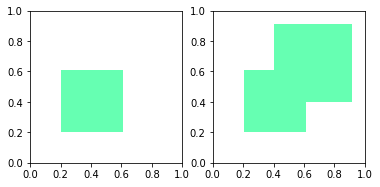

In [2]:
rect0 = Rectangle(0.2, 0.6, 0.2, 0.6)
rect1 = Rectangle(0.4, 0.9, 0.4, 0.9)
combined = rect0 | rect1
shapes = [rect0, combined]

fig, ax = plt.subplots(1, len(shapes))
for i, shape in enumerate(shapes):
  shape.plot(ax[i], full=True)
plt.show()

constraints1 = [ConstraintsGroup([Constraint('1 :- 0')])]
constraints2 = [ConstraintsGroup([Constraint('n0 :- n1')])]

### Define the neural network

In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear = nn.Sequential(
            nn.Linear(2, 4),
            nn.Tanh(),
            nn.Linear(4, 2),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.linear(x)
        return x

model1 = NeuralNetwork()
model2 = NeuralNetwork()
print(model1)

NeuralNetwork(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): Tanh()
    (2): Linear(in_features=4, out_features=2, bias=True)
    (3): Sigmoid()
  )
)


### Train and test the model

Epoch 1
-------------------------------
loss: 0.913752 [    0/10000]
loss: 0.558215 [ 6400/10000]
Test Error: 
 Accuracy: 85.3%, 63.2%
 Avg loss: 0.008554 

Epoch 2
-------------------------------
loss: 0.538796 [    0/10000]
loss: 0.558334 [ 6400/10000]
Test Error: 
 Accuracy: 85.3%, 63.2%
 Avg loss: 0.008360 

Epoch 3
-------------------------------
loss: 0.533672 [    0/10000]
loss: 0.558613 [ 6400/10000]
Test Error: 
 Accuracy: 85.3%, 59.6%
 Avg loss: 0.008301 

Epoch 4
-------------------------------
loss: 0.535708 [    0/10000]
loss: 0.558536 [ 6400/10000]
Test Error: 
 Accuracy: 85.3%, 59.1%
 Avg loss: 0.008264 

Epoch 5
-------------------------------
loss: 0.535247 [    0/10000]
loss: 0.553817 [ 6400/10000]
Test Error: 
 Accuracy: 85.3%, 62.6%
 Avg loss: 0.008058 

Epoch 6
-------------------------------
loss: 0.524951 [    0/10000]
loss: 0.519353 [ 6400/10000]
Test Error: 
 Accuracy: 85.3%, 75.2%
 Avg loss: 0.007293 

Epoch 7
-------------------------------
loss: 0.475012 [  

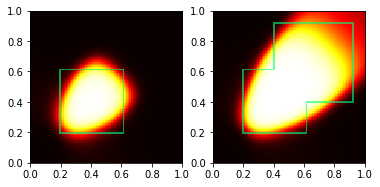

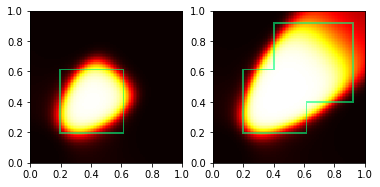

In [4]:
experiment = Experiment('rectangles', model1, shapes, constraints1)
experiment.run(50)
#experiment.save(dir='./models/')

In [5]:
experiment = Experiment('rectangles-rev', model2, shapes, constraints2)
experiment.run(50)
#experiment.save(dir='./models/')

Epoch 1
-------------------------------
loss: 0.617144 [    0/10000]
loss: 0.547545 [ 6400/10000]
Test Error: 
 Accuracy: 80.9%, 61.4%
 Avg loss: 0.009027 

Epoch 2
-------------------------------
loss: 0.515908 [    0/10000]
loss: 0.518490 [ 6400/10000]
Test Error: 
 Accuracy: 80.9%, 59.1%
 Avg loss: 0.008455 

Epoch 3
-------------------------------
loss: 0.491423 [    0/10000]
loss: 0.508909 [ 6400/10000]
Test Error: 
 Accuracy: 80.9%, 58.1%
 Avg loss: 0.008268 

Epoch 4
-------------------------------
loss: 0.488533 [    0/10000]
loss: 0.505771 [ 6400/10000]
Test Error: 
 Accuracy: 80.9%, 58.3%
 Avg loss: 0.008141 

Epoch 5
-------------------------------
loss: 0.487132 [    0/10000]
loss: 0.503299 [ 6400/10000]
Test Error: 
 Accuracy: 80.9%, 59.9%
 Avg loss: 0.008024 

Epoch 6
-------------------------------
loss: 0.486392 [    0/10000]
loss: 0.499840 [ 6400/10000]
Test Error: 
 Accuracy: 80.9%, 61.4%
 Avg loss: 0.007931 

Epoch 7
-------------------------------
loss: 0.486195 [  